<a href="https://colab.research.google.com/github/aezazueta/Proyecto1/blob/main/PROYECTO_02_ALAIN_ZAZUETA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Carga de librerias y de archivo csv a un dataframe.
#import pyforest
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from sklearn import decomposition 

dfSales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DBs/OnlineRetail.csv', sep=';')
dfSales.columns = dfSales.columns.str.upper()
dfSales


,INVOICENO,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,UNITPRICE,CUSTOMERID,COUNTRY
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Se crea y anexa al dataframe una nueva columna ("TOTAL") que calcule el importe total entre el precio unitario y la cantidad de items.

In [2]:
def total(row):
  result = row[3] * row[5]
  return result

dfSales['TOTAL'] = dfSales.apply(total, axis = 1)

En reporte de abajo se detectan múltiples valores nulos en las columnas "DESCRIPTION" y "CUSTOMERID", se procede a imputar estas entradas.

In [3]:
print('Número de Filas: ', dfSales.shape[0])
print('Número de Columnas: ', dfSales.shape[1], '\n')
print('Valores nulos por columna:')
print(dfSales.isnull().sum())

Número de Filas:  541909
Número de Columnas:  9 

Valores nulos por columna:
INVOICENO           0
STOCKCODE           0
DESCRIPTION      1454
QUANTITY            0
INVOICEDATE         0
UNITPRICE           0
CUSTOMERID     135080
COUNTRY             0
TOTAL               0
dtype: int64


En el caso de los valores nulos en 'CUSTOMERID' se reemplazan por el valor '0', se opta por no eliminar todas esas entradas puesto que representan un numero importante de datos.

In [4]:
from pandas.io.formats.style_render import Subset
dfSales.CUSTOMERID.fillna(0, inplace=True)
print('Número de filas ya depuradas: ', dfSales.shape[0])
#cambio de tipo de dato de columna CUSTOMERID de flotante a entero
dfSales['CUSTOMERID'] = dfSales['CUSTOMERID'].astype('int64')
dfSales.dtypes

Número de filas ya depuradas:  541909


INVOICENO       object
STOCKCODE       object
DESCRIPTION     object
QUANTITY         int64
INVOICEDATE     object
UNITPRICE      float64
CUSTOMERID       int64
COUNTRY         object
TOTAL          float64
dtype: object

Realizando un análisis más profundo se detectó que los valores nulos en la columna 'DESCRIPTION' corresponden a entradas sin usuario, valor unitario ni descripción, por lo que representan datos irrelevantes para el proyecto.

In [5]:
#LAS ENTRADAS CUYA DESCRIPCION ES NULA AL PARECER FUERON PRUEBAS O COMPRAS ERRONEAS PUESTO QUE TODAS SON
#DEL CLIENTE 0 Y EL PRECIO DE LAS TRANSACCIONES ES '0' TBN
desc2 = dfSales[(dfSales.UNITPRICE == 0) & (dfSales.DESCRIPTION.isnull()) & (dfSales.CUSTOMERID == 0)]
desc2

,INVOICENO,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,UNITPRICE,CUSTOMERID,COUNTRY,TOTAL
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,0,United Kingdom,0.0
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,0,United Kingdom,0.0
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,0,United Kingdom,0.0
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,0,United Kingdom,0.0
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,0,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,0,United Kingdom,-0.0
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,0,United Kingdom,0.0
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,0,United Kingdom,0.0
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,0,United Kingdom,0.0


Se procede a eliminar las entradas con valores nulos en 'DESCRIPTION'

In [6]:
dfSales.dropna(subset=['DESCRIPTION'], inplace=True)
print(dfSales.DESCRIPTION.isna().sum())
print(dfSales.shape)
print(dfSales.isnull().sum())


0
(540455, 9)
INVOICENO      0
STOCKCODE      0
DESCRIPTION    0
QUANTITY       0
INVOICEDATE    0
UNITPRICE      0
CUSTOMERID     0
COUNTRY        0
TOTAL          0
dtype: int64


In [7]:
ventasNulas = dfSales[(dfSales.DESCRIPTION.isnull()) & (dfSales.CUSTOMERID == 0) & (dfSales.COUNTRY == 'United Kingdom')]
ventasNulas
#ENTRADAS SIN DESCRIPCIÓN, PRECIO NI NUMERO DE CLIENTE

,INVOICENO,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,UNITPRICE,CUSTOMERID,COUNTRY,TOTAL


Se vuelven a revisar las entradas cuya clave de cliente es '0' y se puede ver que tienen datos relevantes. Probablemente fueron compras de usuarios no registrados (invitados)

In [8]:
dfSales[dfSales.CUSTOMERID == 0]

,INVOICENO,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,UNITPRICE,CUSTOMERID,COUNTRY,TOTAL
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,0,United Kingdom,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,0,United Kingdom,5.02
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,0,United Kingdom,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,0,United Kingdom,3.32
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,0,United Kingdom,14.94
...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,0,United Kingdom,20.65
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,0,United Kingdom,16.52
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,0,United Kingdom,4.96
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,0,United Kingdom,10.79


Se generan valores estadístios para las columnas con valores numéricos, se detecta que la columna 'QUANTITY' tiene el mismo valor pero con signo invertido en los parametros MAX y MIN además de ser un valor muy alto. Esto puede ser una compra con su respectiva cancelación

In [9]:
print('Estadisticos de columnas numéricas ','\n')
print(dfSales.describe())


Estadisticos de columnas numéricas  

            QUANTITY      UNITPRICE     CUSTOMERID          TOTAL
count  540455.000000  540455.000000  540455.000000  540455.000000
mean        9.603129       4.623519   11507.851471      18.036188
std       218.007598      96.889628    6760.792031     379.318894
min    -80995.000000  -11062.060000       0.000000 -168469.600000
25%         1.000000       1.250000   12367.000000       3.480000
50%         3.000000       2.080000   14390.000000       9.840000
75%        10.000000       4.130000   16261.000000      17.400000
max     80995.000000   38970.000000   18287.000000  168469.600000


Se revisan valores outliers y se detecta el valor anteriormente comentado y otro elevado con su respectivo valor negativo. Probablemente otra compra cancelada.

<function matplotlib.pyplot.show>

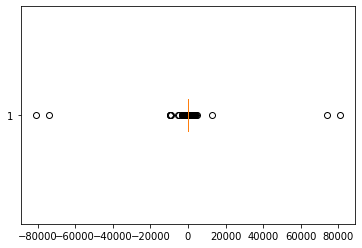

In [10]:

plt.boxplot(dfSales['QUANTITY'], vert=False)
plt.show

<function matplotlib.pyplot.show>

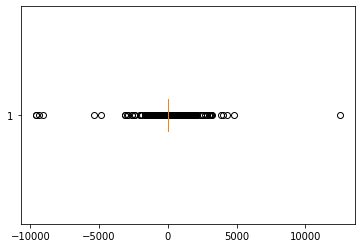

In [11]:
#ELIMINANDO OUTLIERS (COMPRAS DE SUMAS MUY ALTAS PERO QUE SE CANCELARON) 
dfSales.drop(dfSales[(dfSales.QUANTITY < -20000) | (dfSales.QUANTITY > 20000)].index , inplace= True)
plt.boxplot(dfSales['QUANTITY'], vert= False)
plt.show

<function matplotlib.pyplot.show>

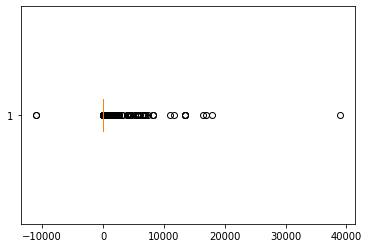

In [12]:
plt.boxplot(dfSales['UNITPRICE'], vert=False)
plt.show

En la columna 'TOTAL' también se detecta un patrón similar a la de las compras realizadas y canceladas. Se procede a purgarlo

<function matplotlib.pyplot.show>

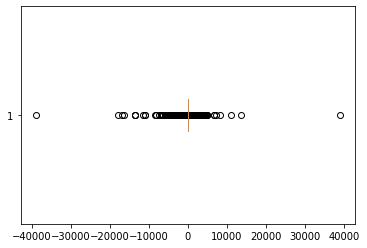

In [13]:
plt.boxplot(dfSales['TOTAL'], vert=False)
plt.show

<function matplotlib.pyplot.show>

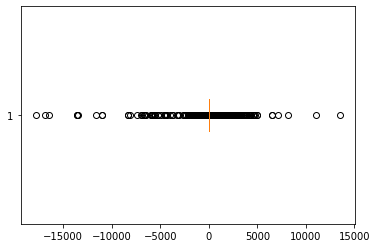

In [14]:
dfSales.drop(dfSales[(dfSales.TOTAL < -35000) | (dfSales.TOTAL > 35000)].index , inplace= True)
plt.boxplot(dfSales['TOTAL'], vert= False)
plt.show

In [15]:
dfSales[dfSales.UNITPRICE <=0]   #COMPRAS GRATUITAS????

,INVOICENO,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,UNITPRICE,CUSTOMERID,COUNTRY,TOTAL
6391,536941,22734,amazon,20,12/3/2010 12:08,0.0,0,United Kingdom,0.0
6392,536942,22139,amazon,15,12/3/2010 12:08,0.0,0,United Kingdom,0.0
7313,537032,21275,?,-30,12/3/2010 16:50,0.0,0,United Kingdom,-0.0
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647,Germany,0.0
13217,537425,84968F,check,-20,12/6/2010 15:35,0.0,0,United Kingdom,-0.0
...,...,...,...,...,...,...,...,...,...
535336,581213,22576,check,-30,12/7/2011 18:38,0.0,0,United Kingdom,-0.0
536908,581226,23090,missing,-338,12/8/2011 9:56,0.0,0,United Kingdom,-0.0
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,0,United Kingdom,0.0
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,0,United Kingdom,0.0


Se aplica la tecnica de ONE HOT ENCODING en la columna 'COUNTRY' por ser un campo categórico nominal. 
Para optimizar el proceso se cambia el tipo de dato de la columna a 'category'



In [16]:
dfSales['COUNTRY'] = dfSales['COUNTRY'].astype('category')
dfSales['COUNTRY'].dtype

CategoricalDtype(categories=['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil',
                  'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic',
                  'Denmark', 'EIRE', 'European Community', 'Finland', 'France',
                  'Germany', 'Greece', 'Hong Kong', 'Iceland', 'Israel',
                  'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Malta',
                  'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA',
                  'Saudi Arabia', 'Singapore', 'Spain', 'Sweden',
                  'Switzerland', 'USA', 'United Arab Emirates',
                  'United Kingdom', 'Unspecified'],
, ordered=False)

Tecnica de ONE HOT ENCODING con la libreria sklearn

In [17]:
from sklearn.preprocessing import OneHotEncoder
codificador = OneHotEncoder()
codificacion =  codificador.fit_transform(dfSales[['COUNTRY']])
#print(codificador.categories_)
#print(type(codificacion))
#print(codificacion.toarray())
countryCols = pd.DataFrame(codificacion.toarray(), columns=codificador.categories_)
#print(countryCols)
dfSales = pd.concat([dfSales, countryCols], axis=1)
dfSales.drop('COUNTRY', axis= 'columns', inplace= True)
dfSales
#countryCols

,INVOICENO,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,UNITPRICE,CUSTOMERID,TOTAL,"(Australia,)","(Austria,)",...,"(RSA,)","(Saudi Arabia,)","(Singapore,)","(Spain,)","(Sweden,)","(Switzerland,)","(USA,)","(United Arab Emirates,)","(United Kingdom,)","(Unspecified,)"
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,15.30,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,20.34,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,22.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,20.34,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,20.34,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,10.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,12.60,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,16.60,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,16.60,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#SE VUIELVEN A REVISAR LAS COLUMNAS NUMÉRICAS
dfSales[['QUANTITY','UNITPRICE', 'CUSTOMERID', 'TOTAL']].describe()

,QUANTITY,UNITPRICE,CUSTOMERID,TOTAL
count,540449.000000,540449.000000,540449.000000,540449.000000
mean,9.603126,4.550250,11507.816810,18.036388
std,53.557270,81.102357,6760.819166,105.769520
min,-9600.000000,-11062.060000,0.000000,-17836.460000
25%,1.000000,1.250000,12367.000000,3.480000
50%,3.000000,2.080000,14390.000000,9.840000
75%,10.000000,4.130000,16261.000000,17.400000
max,12540.000000,17836.460000,18287.000000,13541.330000


Se confirma que no exiten valores nulos en el DataFrame

In [19]:
dfSales.dropna( inplace=True)
print(dfSales.DESCRIPTION.isna().sum())
print(dfSales.shape)
print(dfSales.isnull().sum())
dfSales[dfSales['DESCRIPTION'].isna()]
#print(dfSales.isnull().sum())

0
(538989, 46)
INVOICENO                  0
STOCKCODE                  0
DESCRIPTION                0
QUANTITY                   0
INVOICEDATE                0
UNITPRICE                  0
CUSTOMERID                 0
TOTAL                      0
(Australia,)               0
(Austria,)                 0
(Bahrain,)                 0
(Belgium,)                 0
(Brazil,)                  0
(Canada,)                  0
(Channel Islands,)         0
(Cyprus,)                  0
(Czech Republic,)          0
(Denmark,)                 0
(EIRE,)                    0
(European Community,)      0
(Finland,)                 0
(France,)                  0
(Germany,)                 0
(Greece,)                  0
(Hong Kong,)               0
(Iceland,)                 0
(Israel,)                  0
(Italy,)                   0
(Japan,)                   0
(Lebanon,)                 0
(Lithuania,)               0
(Malta,)                   0
(Netherlands,)             0
(Norway,)                  0

,INVOICENO,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,UNITPRICE,CUSTOMERID,TOTAL,"(Australia,)","(Austria,)",...,"(RSA,)","(Saudi Arabia,)","(Singapore,)","(Spain,)","(Sweden,)","(Switzerland,)","(USA,)","(United Arab Emirates,)","(United Kingdom,)","(Unspecified,)"


In [20]:
dfSales.DESCRIPTION.isna().sum()

0

Generación de la tabla rfm extrayendo los campos relevantes para calcular las métricas siguientes: 

**Frecuency:** Cantidad de compras realizadas.


**Recency:** Son los dias transcurridos desde la ultima compra realizada.

**Monetary** **Value:** valor monetario del total de las compras realizadas.

In [21]:
import datetime as dt
dfSales['INVOICEDATE'] = pd.to_datetime(dfSales['INVOICEDATE'])
anchorDate = dt.datetime(2022, 6, 15)

rfm = dfSales.groupby('CUSTOMERID').agg({'INVOICEDATE': lambda x: (anchorDate - x.max()).days, 'INVOICENO': lambda x: len(x), 'TOTAL': lambda x: x.sum()})
rfm

,INVOICEDATE,INVOICENO,TOTAL
CUSTOMERID,,,
0.0,3841,132618,1431110.80
12347.0,3842,182,4310.00
12348.0,3915,31,1797.24
12349.0,3858,73,1757.55
12350.0,4150,17,334.40
...,...,...,...
18280.0,4117,10,180.60
18281.0,4020,7,80.82
18282.0,3847,13,176.60


In [22]:
rfm.rename(columns={'INVOICEDATE' : 'RECENCY', 'INVOICENO': 'FRECUENCY', 'TOTAL':'MONETARY'}, inplace = True)
rfm

,RECENCY,FRECUENCY,MONETARY
CUSTOMERID,,,
0.0,3841,132618,1431110.80
12347.0,3842,182,4310.00
12348.0,3915,31,1797.24
12349.0,3858,73,1757.55
12350.0,4150,17,334.40
...,...,...,...
18280.0,4117,10,180.60
18281.0,4020,7,80.82
18282.0,3847,13,176.60


Se calculan los **percentiles** de cada columna y se le asigna un valor de 1 a 5 a cada una

In [23]:
rfm['R_PERCENTILE'] = rfm['RECENCY'].rank(pct= True, ascending= False)
rfm['R_SCORE'] = pd.qcut(rfm['R_PERCENTILE'], 5, labels= range(5,0,-1))

rfm['F_PERCENTILE'] = rfm['FRECUENCY'].rank(pct= True, ascending= True)
rfm['F_SCORE'] = pd.qcut(rfm['F_PERCENTILE'], 5, labels= range(5,0,-1))

rfm['M_PERCENTILE'] = rfm['MONETARY'].rank(pct= True, ascending= True)
rfm['M_SCORE'] = pd.qcut(rfm['M_PERCENTILE'], 5, labels= range(5, 0, -1))

rfm.head(10)

,RECENCY,FRECUENCY,MONETARY,R_PERCENTILE,R_SCORE,F_PERCENTILE,F_SCORE,M_PERCENTILE,M_SCORE
CUSTOMERID,,,,,,,,,
0.0,3841,132618,1431110.80,0.983528,1,1.000000,1,1.000000,1
12347.0,3842,182,4310.00,0.958705,1,0.879890,1,0.927248,1
12348.0,3915,31,1797.24,0.376001,4,0.418440,3,0.776481,2
12349.0,3858,73,1757.55,0.729238,2,0.663006,2,0.770075,2
12350.0,4150,17,334.40,0.054221,5,0.247426,4,0.296500,4
12352.0,3876,95,1545.41,0.569206,3,0.731755,2,0.741707,2
12353.0,4044,4,89.00,0.167467,5,0.050217,5,0.039579,5
12354.0,4072,58,1079.40,0.139556,5,0.597575,3,0.650423,2
12355.0,4054,13,459.40,0.155456,5,0.191032,5,0.396019,4


Se anexa columna '**RFM SCORE**' con la concatenacion de los tres valores de cada métrica.

In [24]:
rfm['RFM_SCORE'] = rfm['R_SCORE'].astype(str) + rfm['F_SCORE'].astype(str) + rfm['M_SCORE'].astype(str)
rfm.head(15)

,RECENCY,FRECUENCY,MONETARY,R_PERCENTILE,R_SCORE,F_PERCENTILE,F_SCORE,M_PERCENTILE,M_SCORE,RFM_SCORE
CUSTOMERID,,,,,,,,,,
0.0,3841,132618,1431110.80,0.983528,1,1.000000,1,1.000000,1,111
12347.0,3842,182,4310.00,0.958705,1,0.879890,1,0.927248,1,111
12348.0,3915,31,1797.24,0.376001,4,0.418440,3,0.776481,2,432
12349.0,3858,73,1757.55,0.729238,2,0.663006,2,0.770075,2,222
12350.0,4150,17,334.40,0.054221,5,0.247426,4,0.296500,4,544
12352.0,3876,95,1545.41,0.569206,3,0.731755,2,0.741707,2,322
12353.0,4044,4,89.00,0.167467,5,0.050217,5,0.039579,5,555
12354.0,4072,58,1079.40,0.139556,5,0.597575,3,0.650423,2,532
12355.0,4054,13,459.40,0.155456,5,0.191032,5,0.396019,4,554


Se crea otro dataframe unicamente con los valores RFM

In [25]:
rfmPlot = pd.DataFrame()
rfmPlot['RECENCY'] = rfm['R_SCORE']
rfmPlot['FRECUENCY'] = rfm['F_SCORE']
rfmPlot['MONETARY'] = rfm['M_SCORE']
rfmPlot.head(15) 

,RECENCY,FRECUENCY,MONETARY
CUSTOMERID,,,
0.0,1,1,1
12347.0,1,1,1
12348.0,4,3,2
12349.0,2,2,2
12350.0,5,4,4
12352.0,3,2,2
12353.0,5,5,5
12354.0,5,3,2
12355.0,5,5,4


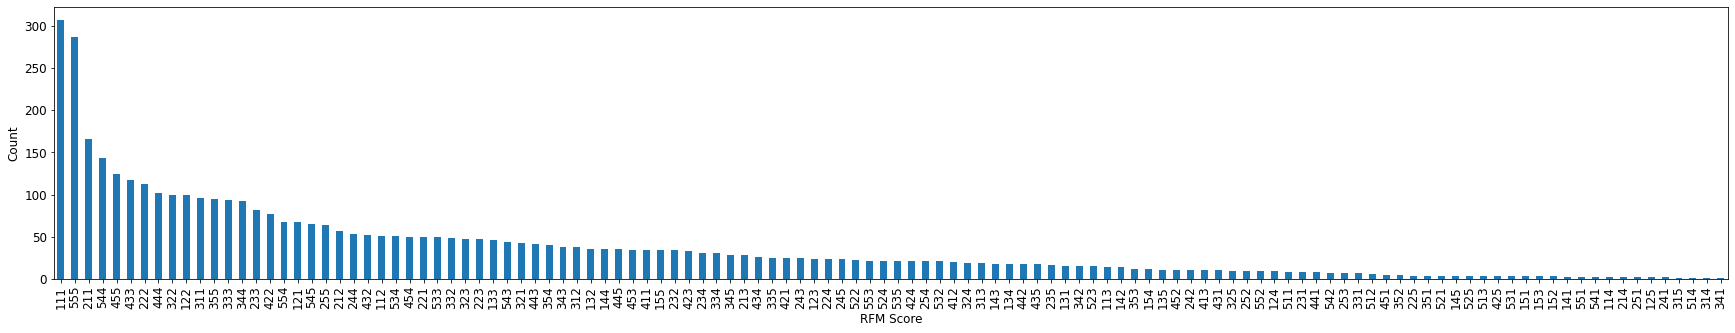

In [26]:
import matplotlib.pyplot as plt

rfmScoreGraph = rfm['RFM_SCORE'].value_counts().plot(kind = 'bar', figsize=(30, 5), fontsize= 12)
rfmScoreGraph.set_xlabel("RFM Score", fontsize= 12)
rfmScoreGraph.set_ylabel("Count", fontsize= 12)
plt.show()


Aunque ya se sabe que solicitan clasificar a los clientes en **5 categorias** se proccede a calcular el valor óptimo de clusters para segmentar con el modelo de clusterización **K-Means** a través de la técnica del **codo de Jambu**.

In [27]:
from sklearn.cluster import KMeans
#rfmPlot = rfmPlot.reset_index()
#rfmPlot = rfmPlot.drop(['CUSTOMERID'], axis=1)
print(rfmPlot)
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, max_iter = 300)
  kmeans.fit(rfmPlot)
  wcss.append(kmeans.inertia_)


           RECENCY FRECUENCY MONETARY
CUSTOMERID                           
0.0              1         1        1
12347.0          1         1        1
12348.0          4         3        2
12349.0          2         2        2
12350.0          5         4        4
...            ...       ...      ...
18280.0          5         5        5
18281.0          5         5        5
18282.0          1         5        5
18283.0          1         1        1
18287.0          3         2        2

[4371 rows x 3 columns]


En la gráfica de **codo de jambu** puede apreciarse que el valor de **WCSS** deja de decrementar de manera drástica entre los valores 4 y 6, pudiendo deducir que el valor óptimo de clusters es **5**.


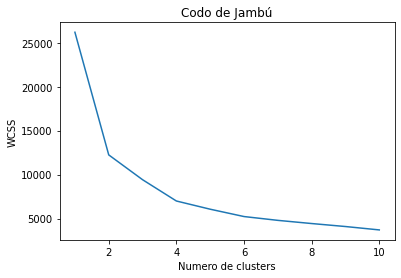

In [28]:
plt.plot(range(1, 11), wcss)
plt.title('Codo de Jambú')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

Se continua con el entrenamiento del modelo y el calculo de los centroides para visualizarlos en la gráfica también.

In [29]:
kmeanCluster = KMeans(n_clusters= 5) #Training y calculo de centroides
kmeanCluster.fit(rfmPlot)
identified_clusters = kmeanCluster.fit_predict(rfmPlot)
print(len(identified_clusters))
identified_clusters
rfmPlot['CLUSTERS'] = identified_clusters
rfmPlot

4371


,RECENCY,FRECUENCY,MONETARY,CLUSTERS
CUSTOMERID,,,,
0.0,1,1,1,3
12347.0,1,1,1,3
12348.0,4,3,2,4
12349.0,2,2,2,3
12350.0,5,4,4,2
...,...,...,...,...
18280.0,5,5,5,2
18281.0,5,5,5,2
18282.0,1,5,5,0


Se grafican los resultados y se observa claramente la segmentación de toda la lista de clientes de acuerdo a los **5 perfiles**. También se muestran las ubicaciones de los **centroides** de cada cluster.

**OJO:** el hecho de que los puntos graficados aparenten estar tan alineados es por los valores que se les asignó a cada una de las métricas (valores enteros del 1 al 5)

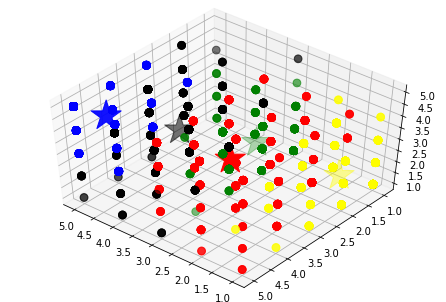

In [30]:
from mpl_toolkits.mplot3d import Axes3D
colors=['red', 'green', 'blue', 'yellow', 'black']
setColor = []
centers = kmeanCluster.cluster_centers_
for row in identified_clusters:
  setColor.append(colors[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(rfmPlot.iloc[:, 0], rfmPlot.iloc[:, 1], rfmPlot.iloc[:, 2], c= setColor, s= 60)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='*', c= colors, s= 1000)
ax.view_init(50, 130)
plt.draw()

Misma gráfica pero versión interactiva, con la diferencia de que no se muestran los centroides.

In [31]:
import plotly.express as px
import plotly.graph_objects as go

from mpl_toolkits.mplot3d import Axes3D
colors=['red', 'green', 'blue', 'yellow', 'black']
setColor = []
centers = kmeanCluster.cluster_centers_
for row in identified_clusters:
  setColor.append(colors[row])

#df = px.data.iris()
fig = go.Figure(data=[go.Scatter3d( x=rfmPlot.iloc[:, 0],
                                   y= rfmPlot.iloc[:, 1],
                                   z= rfmPlot.iloc[:, 2],
                                   mode= 'markers',
                                   marker= dict(
                                       size= 5,
                                       color= setColor,
                                       opacity= 0.8
                                   )
)])
'''fig = go.Figure(data=[go.Scatter3d( x=centers[:, 0],
                                   y= centers[:, 1],
                                   z= centers[:, 2],
                                   mode= 'markers',
                                   marker= dict(
                                       size= 5,
                                       color= setColor,
                                       colorscale= 'Viridis',
                                       opacity= 0.8,
                                       symbol= 'x'
                                   )
)])'''
#fig.show()
fig.update_layout(margin=dict(l=5, r=5, b=5, t=5))   

Definición de cada uno de los perfiles segmentados:

**Mejores clientes**

Son aquellos altamente comprometidos que tienen una mayor frecuencia de compras, lo que hace que generen una mayor cantidad de ingresos.

**Clientes leales**

Generan bastantes ingresos a la empresa, son clientes frecuentes y son sensibles a promociones.

**Clientes nuevos**

Han comprado recientemente, pero con poca frecuencia.

**Clientes en riesgo**

Eventualmente gastaron mucho dinero y lo hicieron con frecuencia, pero ya hace tiempo de eso.

**Clientes perdidos / dormidos**

Realizaron compras hace ya bastante tiempo, no fueron sumas muy grandes y con pocos artículos.